In [1]:
# from sympy import *
# %matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import time

import solvers

In [2]:
# starting position
q0 = np.array([1, 0, 0])
# starting velocity
v0 = np.array([0, 0, 0]) # consistency!

mass = 1
M = np.array([[mass, 0, 0],
              [0, mass, 0],
              [0, 0, 0]])
friction = 0
C = np.array([[friction, 0, 0],
              [0, friction, 0],
              [0, 0, 0]])

# see https://jschoeberl.github.io/IntroSC/ODEs/mechanical.html#systems-with-constraints
force = lambda q: np.concatenate([np.array([0, -0.5]) + np.array([2*q[0]*q[2], 2*q[1]*q[2]]), np.array([q[0]**2 + q[1]**2 - 1])]) # gravity + lambda*constraint_force

In [3]:
status = widgets.HTML("-")
display(status)

HTML(value='-')

In [4]:
def callback(step, new):
    status.value = F"step = {step}, new = {new}"
    
    if (step % 3) == 0:
        clear_output(wait=True)
        fig, ax = plt.subplots()
        ax.set_aspect("equal")
        ax.set(xlim=[-1.5,1.5], ylim=[-1.5,1.5])
        ax.add_patch(plt.Circle((0, 0), 1, fill=False, edgecolor="black"))
        point = ax.plot(new[0], new[1], "bo", animated=True)[0]
        plt.show()
        time.sleep(0.005)

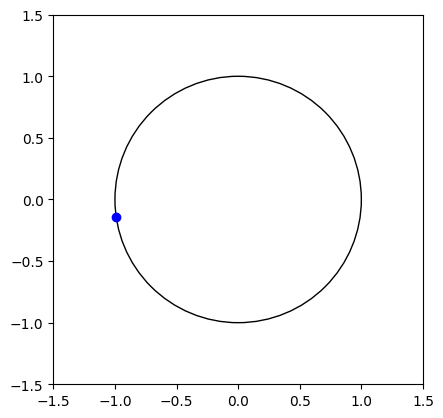

array([-0.9898493 , -0.14212537, -0.10659044,  0.05357712, -0.37316821,
       -0.27987729,  0.21065585, -0.4698091 , -0.35525729])

In [5]:
# if generalized alpha does not work any more, vary rhoinfty
#     or try alpha-RATTLE: https://onlinelibrary.wiley.com/doi/pdf/10.1002/zamm.200610285 equations 17
solvers.generalized_alpha(q0, v0, M, C, force, 1000, 6, callback=callback)